In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
#para graficar barplots
import seaborn as sns
import re
# para manipular cadenas de texto
import string
#natural language toolkit: tokenizar
import nltk
import warnings
#para graficar en el notebook
%matplotlib inline

warnings.filterwarnings('ignore')


In [ ]:
movie= pd.read_csv('/content/movie_review.csv')
movie.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
movie['clean_review'] = np.vectorize(remove_pattern)(movie['review'], "@[\w]*")

In [ ]:
movie.head()

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,With all this stuff going down at the moment w...
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H...","\""The Classic War of the Worlds\"" by Timothy H..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,Superbly trashy and wondrously unpretentious 8...


In [ ]:
movie['clean_review'] = movie['clean_review'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
movie.head()

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,With all this stuff going down at the moment w...
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H...",The Classic War of the Worlds by Timothy H...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,The film starts with a manager Nicholas Bell ...
3,3630_4,0,It must be assumed that those who praised this...,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,Superbly trashy and wondrously unpretentious ...


In [ ]:
movie['clean_review'] = movie['clean_review'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [ ]:
movie.head()

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,With this stuff going down moment with started...
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H...",Classic Worlds Timothy Hines very entertaining...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts with manager Nicholas Bell giving ...
3,3630_4,0,It must be assumed that those who praised this...,must assumed that those praised this film grea...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,Superbly trashy wondrously unpretentious explo...


In [ ]:
tokenized_review = movie['clean_review'].apply(lambda x: x.split())
tokenized_review.head()

0    [With, this, stuff, going, down, moment, with,...
1    [Classic, Worlds, Timothy, Hines, very, entert...
2    [film, starts, with, manager, Nicholas, Bell, ...
3    [must, assumed, that, those, praised, this, fi...
4    [Superbly, trashy, wondrously, unpretentious, ...
Name: clean_review, dtype: object

In [ ]:
tokenized_review.head()

0    [With, this, stuff, going, down, moment, with,...
1    [Classic, Worlds, Timothy, Hines, very, entert...
2    [film, starts, with, manager, Nicholas, Bell, ...
3    [must, assumed, that, those, praised, this, fi...
4    [Superbly, trashy, wondrously, unpretentious, ...
Name: clean_review, dtype: object

In [ ]:
# stemming con las palabras
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_review.head()

0    [with, thi, stuff, go, down, moment, with, sta...
1    [classic, world, timothi, hine, veri, entertai...
2    [film, start, with, manag, nichola, bell, give...
3    [must, assum, that, those, prais, thi, film, g...
4    [superbl, trashi, wondrous, unpretenti, exploi...
Name: clean_review, dtype: object

In [ ]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = " ".join(tokenized_review[i])

movie['clean_review'] = tokenized_review
movie.head()

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,with thi stuff go down moment with start liste...
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H...",classic world timothi hine veri entertain film...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film start with manag nichola bell give welcom...
3,3630_4,0,It must be assumed that those who praised this...,must assum that those prais thi film greatest ...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbl trashi wondrous unpretenti exploit hoo...


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


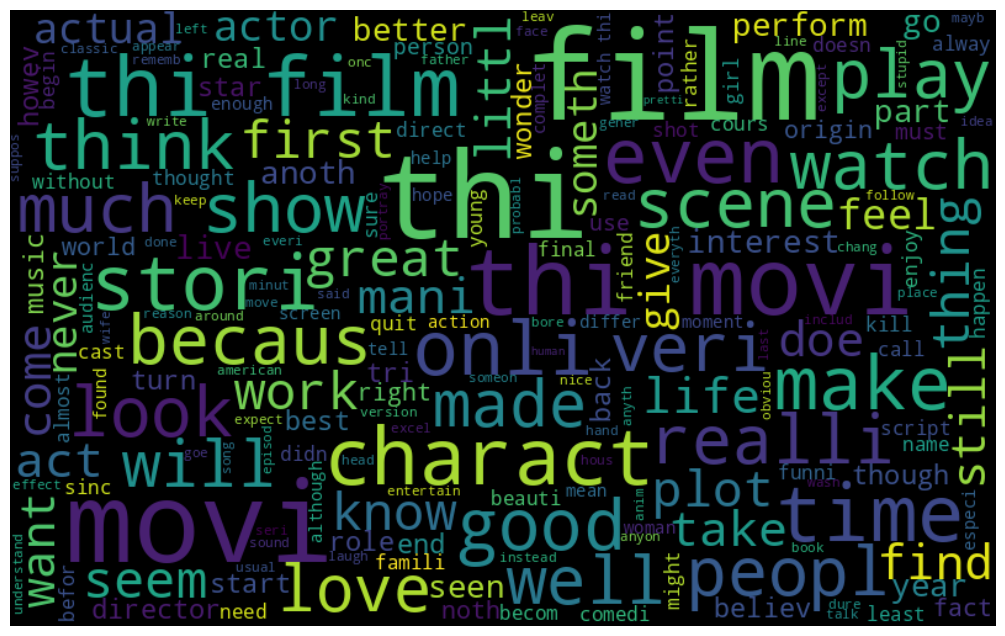

In [ ]:
#Creamos un sólo string con todas las palabras
all_words = " ".join([sentence for sentence in movie['clean_review']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# trazar el gráfico
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

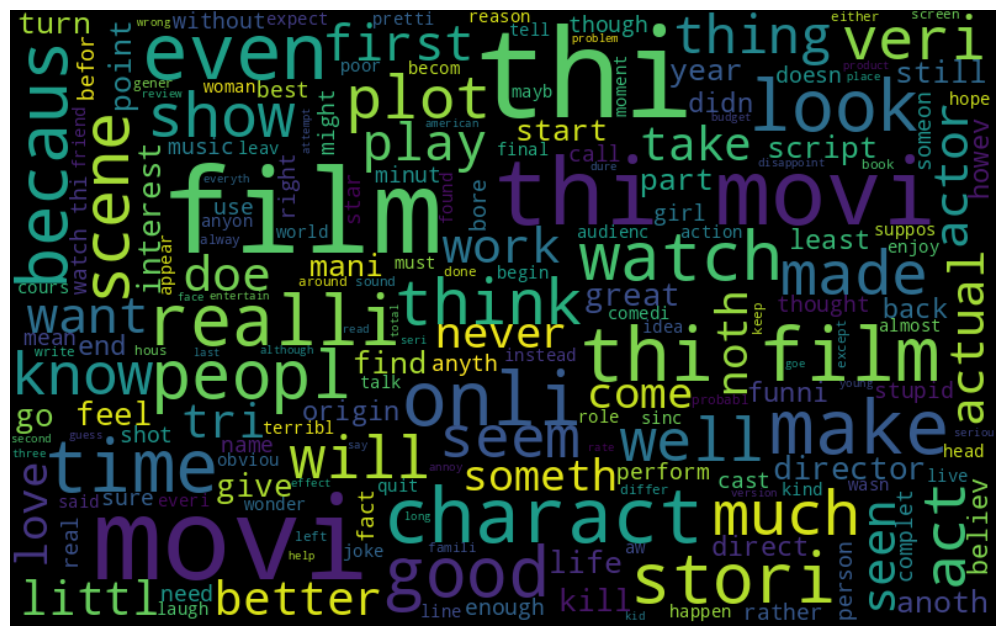

In [ ]:
# Visualizar las palabras frecuentes (NEGATIVAS)
## sólo agregar [df['label']==1]
all_words = " ".join([sentence for sentence in movie['clean_review'][movie['sentiment']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Trazar el gráfico
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#instanciar afinn
afn = Afinn()

#  asignar scores (polaridad) y etiquetas, con base en BD de AFINN
movie['scores'] = [afn.score(article) for article in movie['clean_review']]
movie['sentiment1'] = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in movie['scores']]

In [ ]:
movie

,id,sentiment,review,clean_review,scores,sentiment1
0,5814_8,1,With all this stuff going down at the moment w...,with thi stuff go down moment with start liste...,14.0,positive
1,2381_9,1,"\""The Classic War of the Worlds\"" by Timothy H...",classic world timothi hine veri entertain film...,3.0,positive
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film start with manag nichola bell give welcom...,-5.0,negative
3,3630_4,0,It must be assumed that those who praised this...,must assum that those prais thi film greatest ...,12.0,positive
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbl trashi wondrous unpretenti exploit hoo...,-7.0,negative
...,...,...,...,...,...,...
4995,3720_2,0,Is this film a joke? Is it a comedy? Surely it...,thi film joke comedi sure seriou thriller ther...,0.0,neutral
4996,4229_10,1,Don't waste time reading my review. Go out and...,wast time read review thi astonishingli good e...,9.0,positive
4997,8042_3,0,"The secret is...this movie blows. Sorry, but i...",secret thi movi blow sorri just spoiler thi ri...,3.0,positive
4998,9669_9,1,After reading the original play I thought it w...,after read origin play thought would have been...,4.0,positive


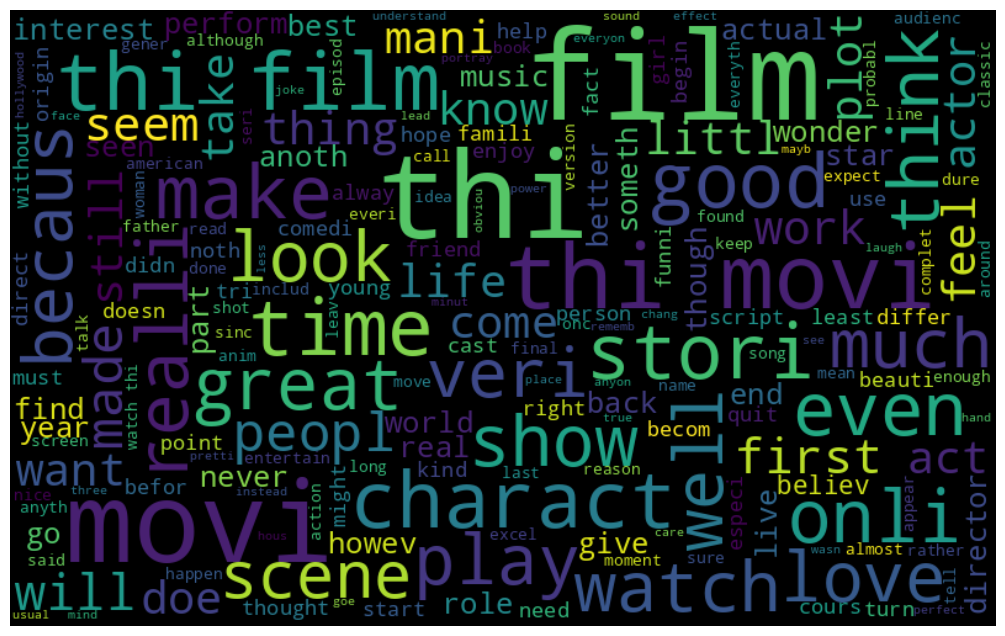

In [ ]:
all_words = " ".join([sentence for sentence in movie['clean_review'][movie['sentiment1']=='positive']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Trazar el gráfico
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

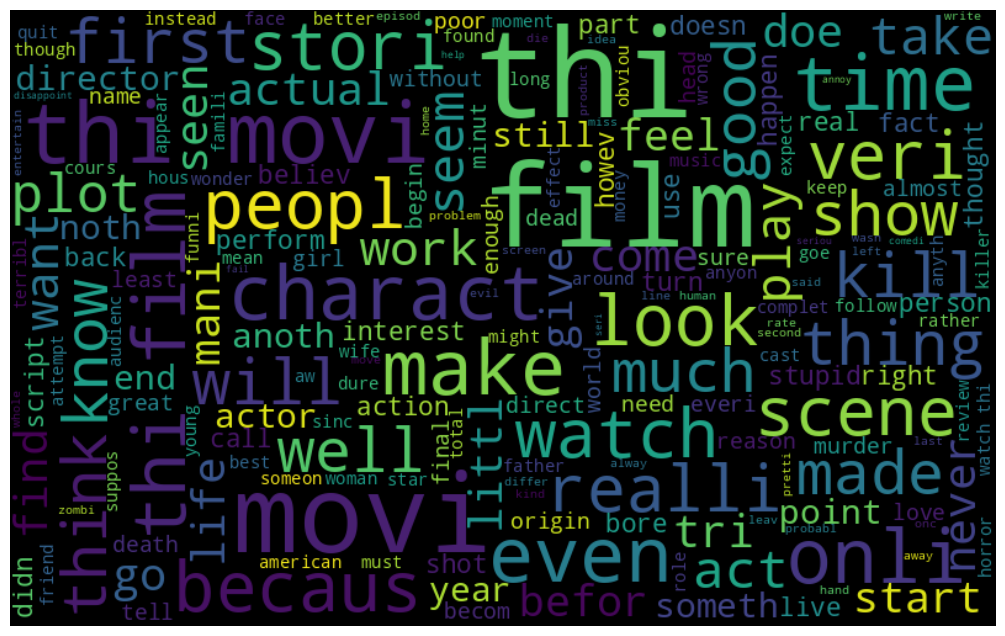

In [ ]:
# PALABRAS NEGATIVAS
all_words = " ".join([sentence for sentence in movie['clean_review'][movie['sentiment1']=='negative']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Trazar el gráfico
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from afinn import Afinn

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=d68ae67a17bab8616a7fcbb9a20a344b8761bee0ab8c8ca1cec7bff2d506b7ce
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn
